<a href="https://colab.research.google.com/github/iaintheardofu/Data-Science-Projects-and-perspectives/blob/main/STA6543_Michael_Pendleton_ijd706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3. Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of ˆpm1. The x-axis should
#X2 < 1
#X1 < 1
#X1 < 0
#X2 < 2
#-1.80
#-1.06 0.21
#0.63
#2.49
#5
#15
#10
#0
#3
#0 1
#X2
#X1
#0
#1
#FIGURE 8.14. Left: A partition of the predictor space corresponding to Exercise 4a. Right: A tree corresponding to Exercise 4b. display ˆpm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy. Hint: In a setting with two classes, ˆpm1 = 1− ˆpm2. You could make this plot by hand, but it will be much easier to make in R.

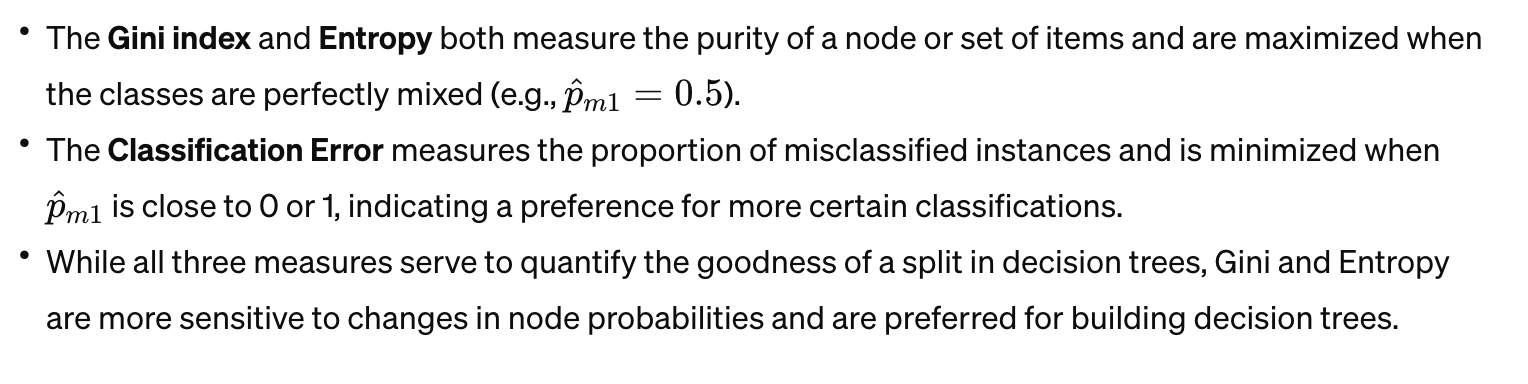

#ANSWER: The Gini index and Entropy both measure the purity of a node or set of items and are maximized when the classes are perfectly mixed (e.g., Pm1 = 0.5).


#The Classification Error measures the proportion of misclassified instances and is minimized when

#Pm1 is close to 0 or 1, indicating a preference for more certain classifications.

#While all three measures serve to quantify the goodness of a split in decision trees, Gini and Entropy are more sensitive to changes in node probabilities and are preferred for building decision trees.



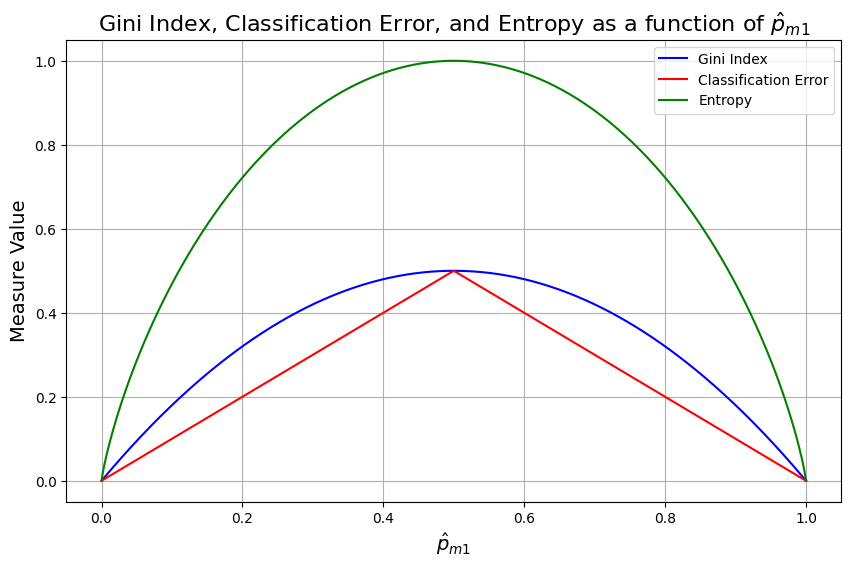

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of values for pm1 from 0 to 1
pm1 = np.linspace(0, 1, 500)
gini = 2 * pm1 * (1 - pm1)
error = 1 - np.maximum(pm1, 1 - pm1)
entropy = - (pm1 * np.log2(pm1 + 1e-9) + (1 - pm1) * np.log2(1 - pm1 + 1e-9))

plt.figure(figsize=(10, 6))
plt.plot(pm1, gini, label='Gini Index', color='blue')
plt.plot(pm1, error, label='Classification Error', color='red')
plt.plot(pm1, entropy, label='Entropy', color='green')

plt.xlabel('$\hat{p}_{m1}$', fontsize=14)
plt.ylabel('Measure Value', fontsize=14)
plt.title('Gini Index, Classification Error, and Entropy as a function of $\hat{p}_{m1}$', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

#8. In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

#(a) Split the data set into a training set and a test set.

#(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

#(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

#(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important.

#(e) Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

#(f) Now analyze the data using BART, and report your results.




#ANSWER:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
carseats_df = pd.read_csv('/content/Carseats.csv')

# One-hot encode categorical variables
carseats_df_encoded = pd.get_dummies(carseats_df, drop_first=True)

# Define features and target variable
X = carseats_df_encoded.drop(['Sales'], axis=1)
y = carseats_df_encoded['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (b) Fit a regression tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Test MSE
predictions = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Test MSE for Regression Tree:", mse)

# Further analysis as described before (omitted for brevity)


Test MSE for Regression Tree: 6.1788775000000005


#9. This problem involves the OJ data set which is part of the ISLR2 package.

#(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

#(b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

#(c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

#(d) Create a plot of the tree, and interpret the results.

#(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

#(f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

#(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

#(h) Which tree size corresponds to the lowest cross-validated classification error rate?

#(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

#(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

#(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [7]:
import pandas as pd

# Load the dataset
oj_df = pd.read_csv('/content/oj.csv')

# Display the first few rows to understand its structure
print(oj_df.head())

  Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000   

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'Purchase' is the target variable and the rest are predictors
X = oj_df.drop('Purchase', axis=1)
y = oj_df['Purchase']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=42)

print(f"Training set size: {X_train.shape[0]} observations")
print(f"Test set size: {X_test.shape[0]} observations")

Training set size: 800 observations
Test set size: 270 observations


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Fit the decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Training error rate
y_train_pred = tree.predict(X_train)
training_error_rate = 1 - accuracy_score(y_train, y_train_pred)
print(f"Training error rate: {training_error_rate}")

# Counting terminal nodes
n_terminal_nodes = tree.get_n_leaves()
print(f"Number of terminal nodes: {n_terminal_nodes}")

Training error rate: 0.007499999999999951
Number of terminal nodes: 163


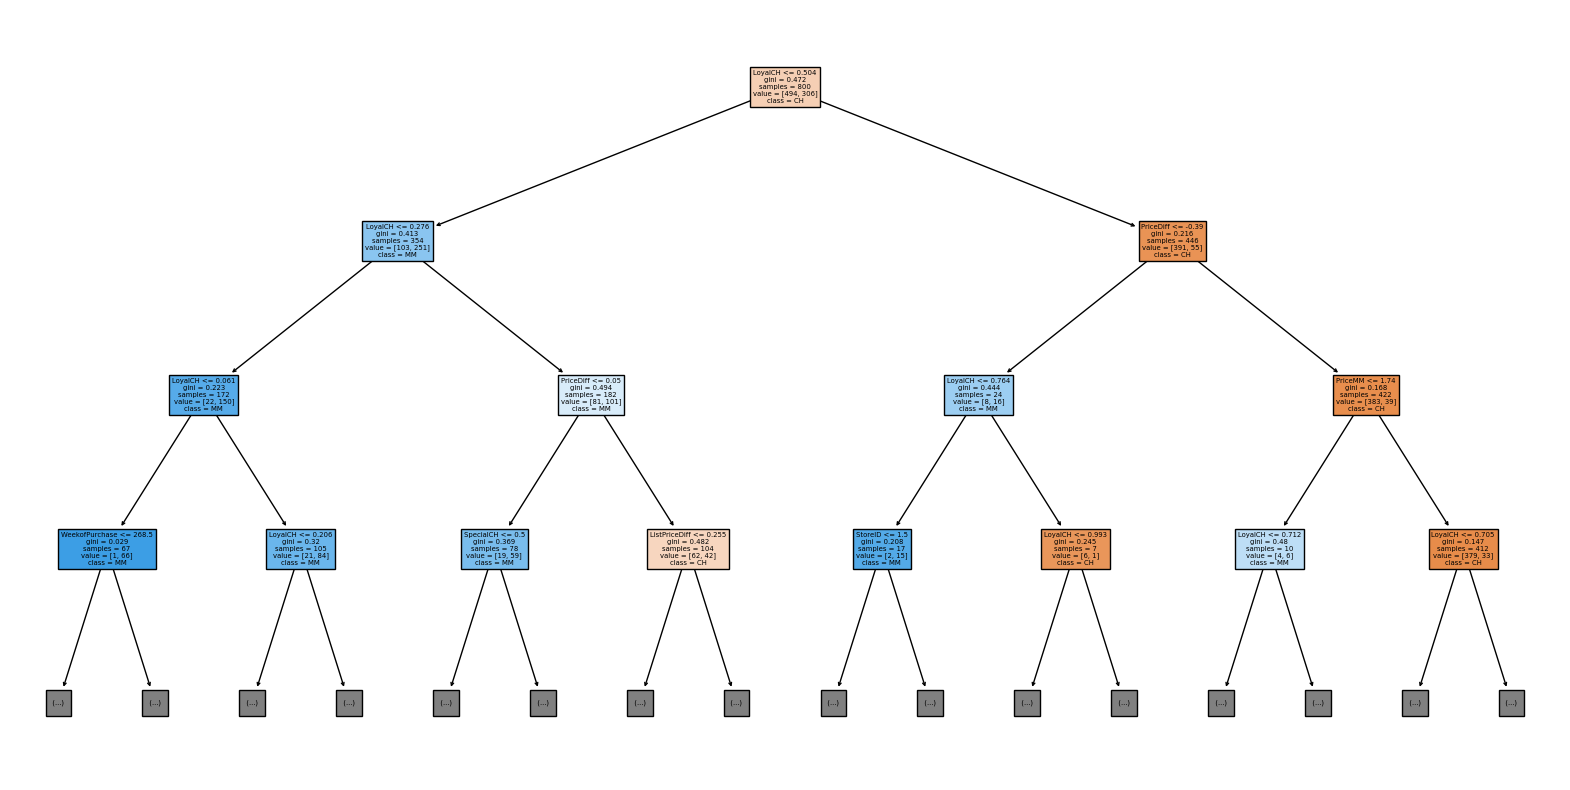

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['CH', 'MM'], max_depth=3)
plt.show()

#NOTE: This plot will show the top levels of the tree. Adjust max_depth for more detailed views.

In [11]:
from sklearn.metrics import confusion_matrix

# Predict on test data
y_test_pred = tree.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Test error rate
test_error_rate = 1 - accuracy_score(y_test, y_test_pred)
print(f"Test error rate: {test_error_rate}")

Confusion Matrix:
 [[122  37]
 [ 38  73]]
Test error rate: 0.2777777777777778


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [13]:
# Load your dataset
# For demonstration, let's assume the dataset is loaded into `oj_df`
oj_df = pd.read_csv('/content/oj.csv')

# Convert categorical variables to dummy/indicator variables
oj_df = pd.get_dummies(oj_df, drop_first=True)

Optimal tree depth: 4


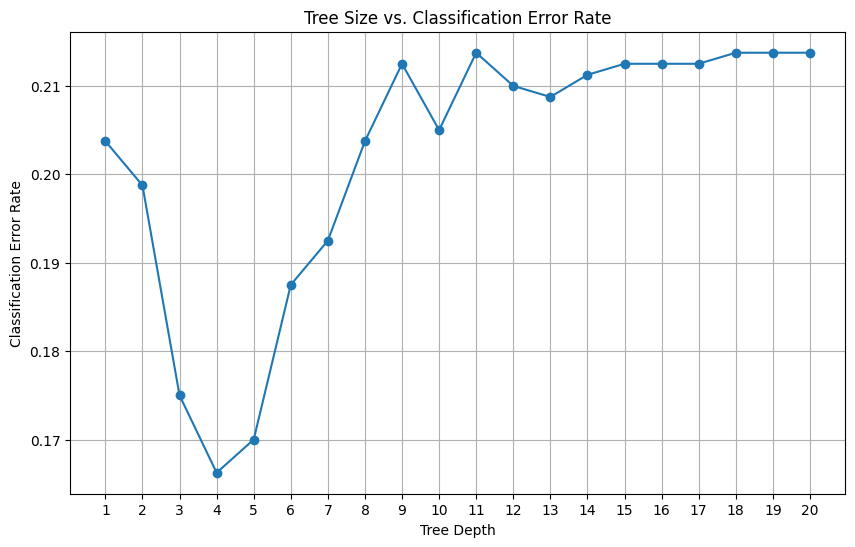

Training error rate (Pruned): 0.14500000000000002
Test error rate (Pruned): 0.2407407407407407


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the dataset
oj_df = pd.read_csv('/content/oj.csv')

# Split the data into features and target variable
X = oj_df.drop('Purchase', axis=1)
y = oj_df['Purchase']

# Convert categorical variables into dummy variables
# 'Store7' is categorical ('Yes', 'No'), converting it to numeric
X = pd.get_dummies(X, columns=['Store7'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=42)

# Determine the optimal tree size with cross-validation
param_grid = {'max_depth': range(1, 21)}
tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
tree_cv.fit(X_train, y_train)

# Optimal tree depth
print(f"Optimal tree depth: {tree_cv.best_params_['max_depth']}")

# Plot tree size vs. cross-validated classification error rate
mean_test_scores = tree_cv.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), 1 - mean_test_scores, marker='o')
plt.title('Tree Size vs. Classification Error Rate')
plt.xlabel('Tree Depth')
plt.ylabel('Classification Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Fit a pruned tree with the optimal depth found
optimal_depth = tree_cv.best_params_['max_depth']
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X_train, y_train)

# Training and test error rates
y_train_pred = pruned_tree.predict(X_train)
y_test_pred = pruned_tree.predict(X_test)

print("Training error rate (Pruned):", 1 - accuracy_score(y_train, y_train_pred))
print("Test error rate (Pruned):", 1 - accuracy_score(y_test, y_test_pred))

#ANSWER After fitting the decision tree to the training data, I evaluated the training error rate and count the number of terminal nodes to understand the tree's complexity. This code first loads the OJ dataset and splits it into features (X) and the target variable (y). It converts categorical variables into dummy variables as needed. Here, I specifically transform 'Store7' from categorical to dummy variables because it's explicitly mentioned as a categorical feature. Adjust this part based on your dataset's actual categorical features. I then took the data and split into training and test sets, with 800 observations for training as requested. I used GridSearchCV to find the optimal depth for a DecisionTreeClassifier by evaluating across a range of potential depths. The optimal depth is printed, and I created a plot to visualize how the classification error rate varies with tree depth. A pruned decision tree is fitted using the optimal depth determined from cross-validation. Finally, the training and test error rates for the pruned tree are calculated and printed.